# Complex Networks Metrics Applied to Barcelona Transportation

### Balthazar Paixão

November 2023

### Assignment

#### In this assignment you must install and get familiar with the NetworkX library for network analysis. You must choose at least one network available in The Colorado Index of Complex Networks (ICON) repository (https://icon.colorado.edu/#!/), and characterize it using different metrics, such as degree, distance and clustering (you can choose the others). For each analyzed metric, calculate the following statistics: maximum, minimum, mean, standard deviation, and empirical distribution. Write a report discussing the obtained values. Submit the report in this assignment.


### [Barcelona Transportation] (https://github.com/bstabler/TransportationNetworks/blob/master/Barcelona)

#### The chosen network is a directed network of the public transportation system of Barcelona, Spain. The network contains 1,1020 nodes and 2522 edges. The nodes represent the bus stops and the edges represent the bus lines. The network is directed because the bus lines have a direction of travel. The network is weighted because the edges have a weight that represents the time it takes to travel along the edge.

- Zones: 110
- Nodes: 1020
- Links: 2522
- Trips: 184679.561


In [1]:
# libs imports

from random import sample
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
filename = "../../../data/2023_3/Barcelona_flow.tntp"

In [3]:
# function to read the edges and vertex by: https://github.com/jvmaues


def load_graph(filename: str):
    edges = []
    volume = []
    cost = []
    with open(filename, "r") as f:
        f.readline()
        for line in f:
            e1, e2, e3, e4 = [x.strip() for x in line.split()]
            edges.append((e1, e2))
            volume.append(float(e3))
            cost.append(float(e4))
    return edges, volume, cost

In [4]:
edges, volume, cost = load_graph(filename)

# create the graph
G = nx.DiGraph()
G.add_edges_from(edges)
G.add_weighted_edges_from(
    [(edges[i][0], edges[i][1], volume[i]) for i in range(len(edges))]
)
# add cost
for i in range(len(edges)):
    G[edges[i][0]][edges[i][1]]["cost"] = cost[i]

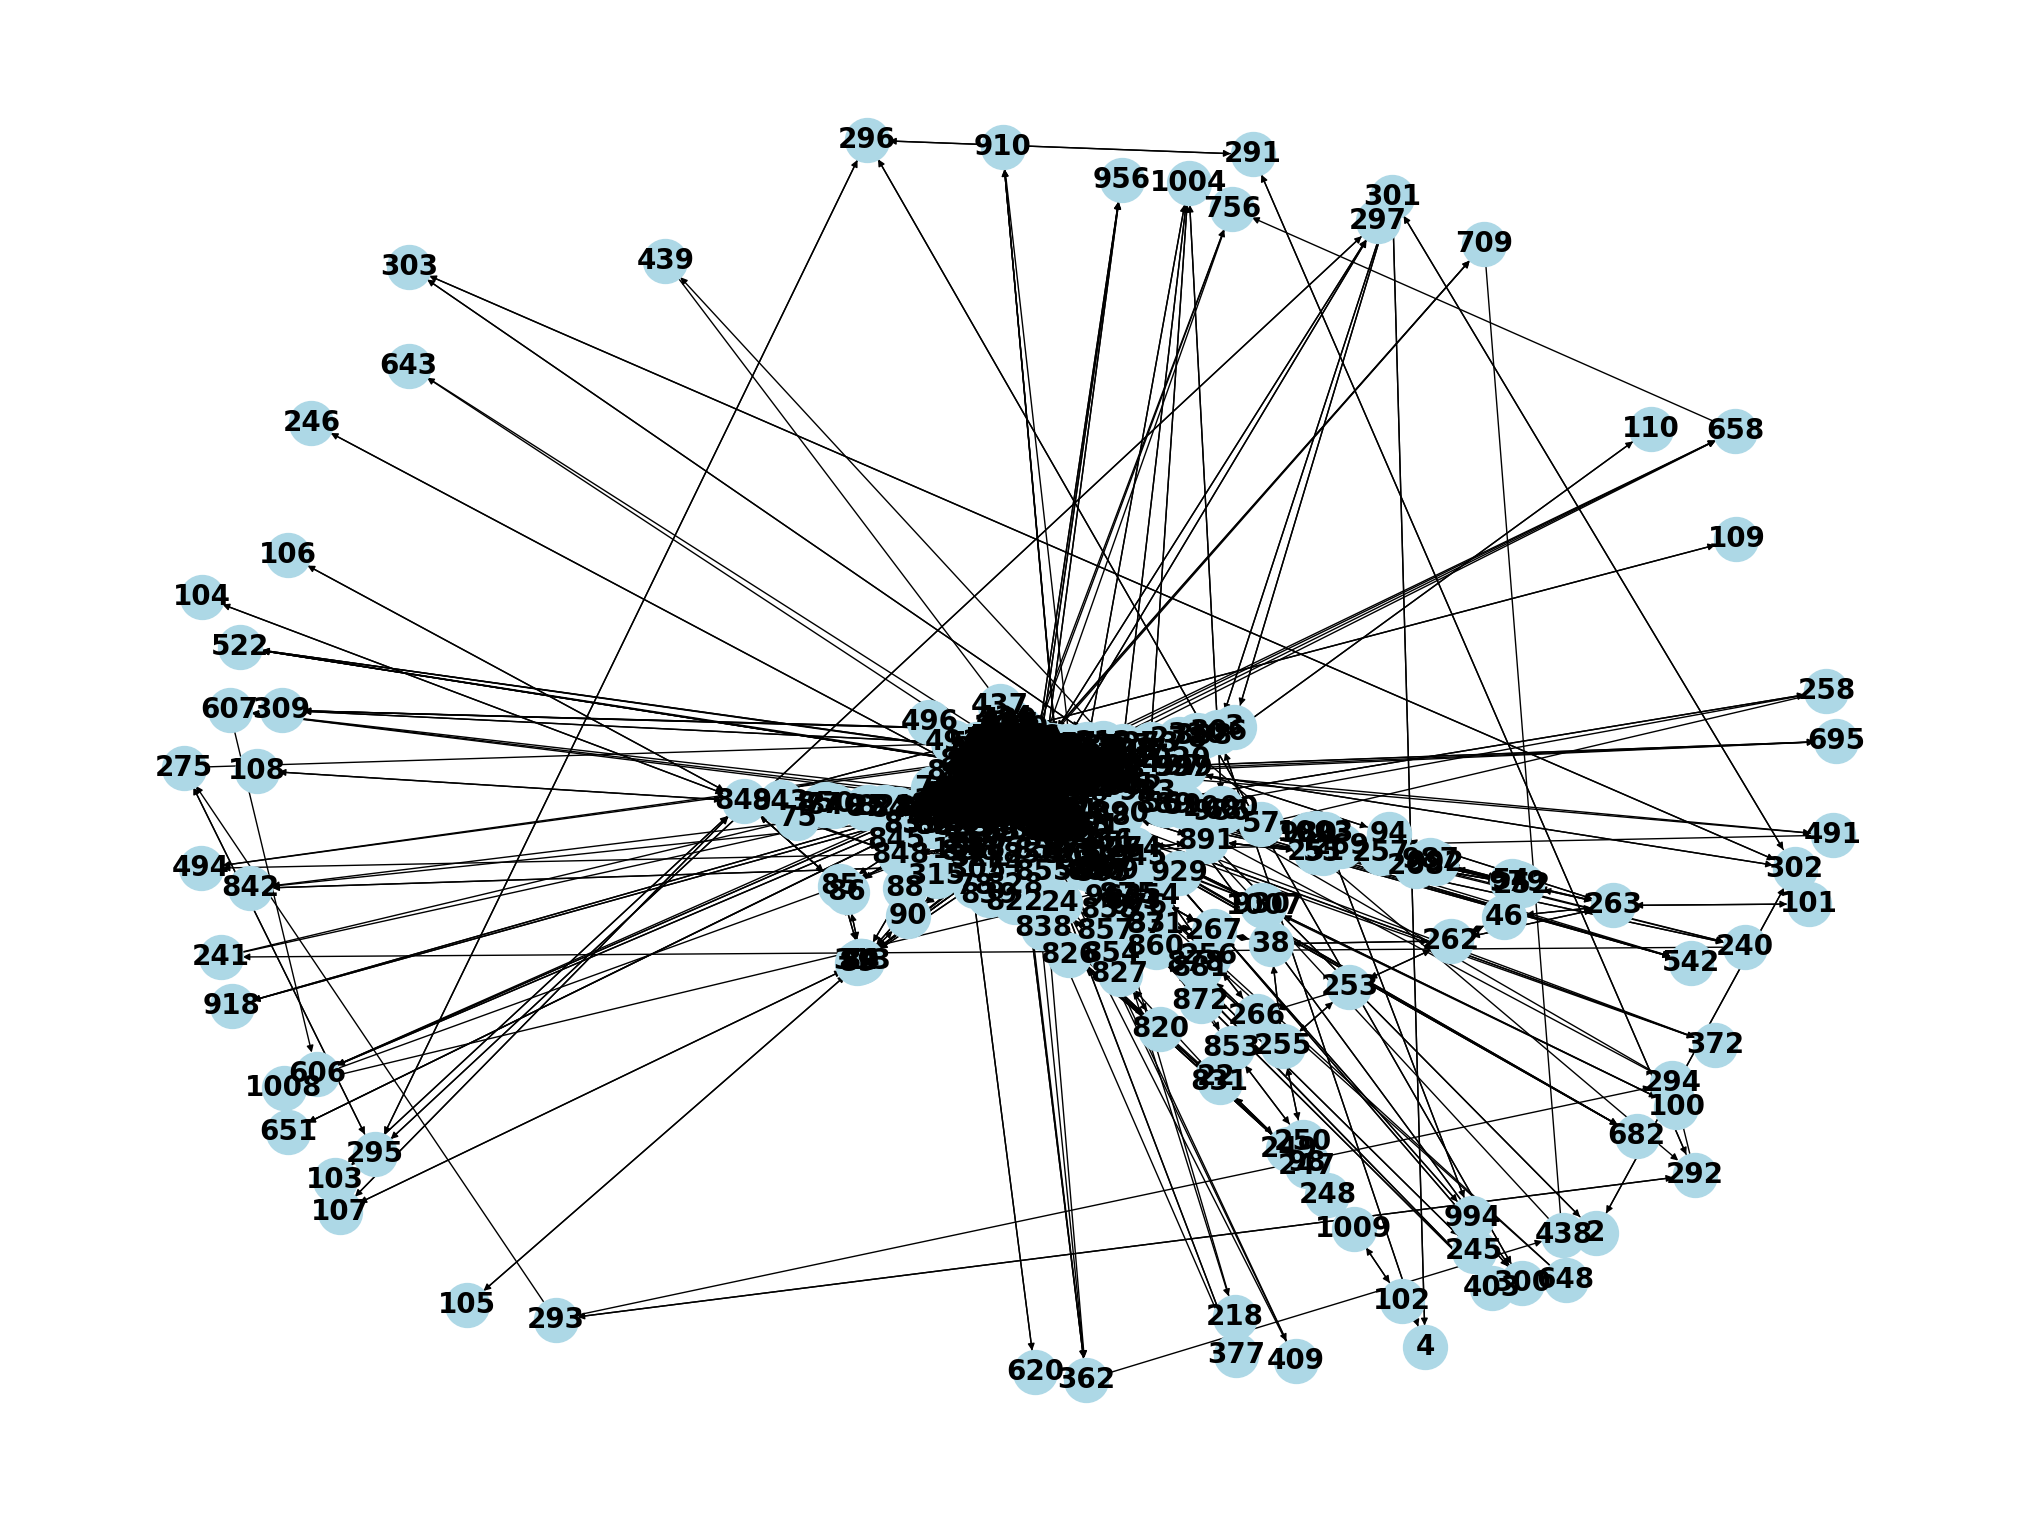

In [5]:
# Plotting the directed graph from the contries
plt.figure(figsize=(20, 15))

nx.draw(
    G,
    with_labels=True,
    font_weight="bold",
    node_size=1000,
    node_color="lightblue",
    font_size=20,
)
plt.draw()

## Network degree


In [6]:
print(f"Stop with the highest degree -> {max(G.degree(), key=lambda x: x[1])}")
print(f"Stop with the lowest degree -> {min(G.degree(), key=lambda x: x[1])}")
print(f"Average degree -> {sum(dict(G.degree()).values())/len(G.nodes()):.5f}")
print(f"Standard deviation of degree -> {np.std(list(dict(G.degree()).values())):.5f}")
print()
print(f"Stop with the highest in-degree -> {max(G.in_degree(), key=lambda x: x[1])}")
print(f"Stop with the lowest in-degree -> {min(G.in_degree(), key=lambda x: x[1])}")
print(f"Average in-degree -> {sum(dict(G.in_degree()).values())/len(G.nodes()):.5f}")
print(
    f"Standard deviation of in-degree -> {np.std(list(dict(G.in_degree()).values())):.5f}"
)
print()
print(f"Stop with the highest out-degree -> {max(G.out_degree(), key=lambda x: x[1])}")
print(f"Stop with the lowest out-degree -> {min(G.out_degree(), key=lambda x: x[1])}")
print(f"Average out-degree -> {sum(dict(G.out_degree()).values())/len(G.nodes()):.5f}")
print(
    f"Standard deviation of out-degree -> {np.std(list(dict(G.out_degree()).values())):.5f}"
)
print()
print(
    f"Stops with in-degree equal to 0 -> {[x for x in G.nodes() if G.in_degree(x) == 0]}"
)
print(
    f"Stops with out-degree equal to 0 -> {[x for x in G.nodes() if G.out_degree(x) == 0]}"
)
print(
    f"Stops with in-degree above average -> {[x for x in G.nodes() if G.in_degree(x) > sum(dict(G.in_degree()).values())/len(G.nodes())]}"
)
print(
    f"Stops with out-degree above average -> {[x for x in G.nodes() if G.out_degree(x) > sum(dict(G.out_degree()).values())/len(G.nodes())]}"
)

Stop with the highest degree -> ('849', 30)
Stop with the lowest degree -> ('9', 2)
Average degree -> 5.42366
Standard deviation of degree -> 2.43034

Stop with the highest in-degree -> ('849', 15)
Stop with the lowest in-degree -> ('9', 1)
Average in-degree -> 2.71183
Standard deviation of in-degree -> 1.24640

Stop with the highest out-degree -> ('849', 15)
Stop with the lowest out-degree -> ('1008', 0)
Average out-degree -> 2.71183
Standard deviation of out-degree -> 1.25842

Stops with in-degree equal to 0 -> []
Stops with out-degree equal to 0 -> ['1008']
Stops with in-degree above average -> ['1', '290', '307', '316', '302', '304', '301', '306', '5', '298', '299', '310', '6', '424', '425', '456', '7', '274', '281', '283', '8', '272', '474', '480', '277', '10', '205', '206', '214', '207', '12', '210', '217', '222', '13', '208', '211', '224', '244', '15', '228', '533', '538', '601', '17', '597', '608', '621', '18', '914', '937', '938', '946', '19', '617', '919', '931', '916', '915'

About the degree, we can observe that the 849  is the stop with the highest degree where, out of a total of with 15 out-degrees and 15 in-degree. In other words, this stop is the one that has the most bus lines passing through it.

There is no stop with in-degree equal to 0, this means that there isn't any stop that is not reached by any bus line. On the other hand, there ia only one stop with out-degree equal to 0, this means that this stop, 1008, is a final stop of a bus line.

## Clustering


In [7]:
clustering = nx.clustering(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

print()


print(
    f"Stop with the highest clustering -> {max(clustering, key=lambda x: clustering[x])}"
)
print(
    f"Stop with the lowest clustering -> {min(clustering, key=lambda x: clustering[x])}"
)
print(f"Average clustering -> {nx.average_clustering(G):.5f}")
print(
    f"Standard deviation of clustering -> {np.std(list(clustering.values())):.5f}"
)
print()
print(
    f"Stop with the highest closeness centrality -> {max(closeness_centrality, key=lambda x: closeness_centrality[x])}"
)
print(
    f"Stop with the lowest closeness centrality -> {min(closeness_centrality, key=lambda x: closeness_centrality[x])}"
)
print(
    f"Average closeness centrality -> {sum(closeness_centrality.values())/len(G.nodes()):.5f}"
)
print(
    f"Standard deviation of closeness centrality -> {np.std(list(closeness_centrality.values())):.5f}"
)
print()
print(
    f"Stop with the highest betweenness centrality -> {max(betweenness_centrality, key=lambda x: betweenness_centrality[x])}"
)
print(
    f"Stop with the lowest betweenness centrality -> {min(betweenness_centrality, key=lambda x: betweenness_centrality[x])}"
)
print(
    f"Average betweenness centrality -> {sum(betweenness_centrality.values())/len(G.nodes()):.5f}"
)
print(
    f"Standard deviation of betweenness centrality -> {np.std(list(betweenness_centrality.values())):.5f}"
)


Stop with the highest clustering -> 2
Stop with the lowest clustering -> 1
Average clustering -> 0.06359
Standard deviation of clustering -> 0.12767

Stop with the highest closeness centrality -> 778
Stop with the lowest closeness centrality -> 21
Average closeness centrality -> 0.07178
Standard deviation of closeness centrality -> 0.00587

Stop with the highest betweenness centrality -> 208
Stop with the lowest betweenness centrality -> 2
Average betweenness centrality -> 0.01401
Standard deviation of betweenness centrality -> 0.01859


## Hubs


In [8]:
hubs, authorities = nx.hits(G)

print(f"Stop with the highest hub -> {max(authorities, key=lambda x: hubs[x])}")
print(f"Stop with the lowest hub -> {min(authorities, key=lambda x: hubs[x])}")
print(f"Average hub -> {sum(hubs.values())/len(hubs.values()):.5f}")
print(f"Standard deviation of hubs -> {np.std(list(hubs.values())):.5f}")
print(
    f"Countries with hub above average -> {[x for x in G.nodes() if hubs[x] > sum(hubs.values())/len(hubs.values())]}"
)

Stop with the highest hub -> 902
Stop with the lowest hub -> 459
Average hub -> 0.00108
Standard deviation of hubs -> 0.01364
Countries with hub above average -> ['640', '60', '61', '62', '902', '908', '632', '925', '65', '638', '628', '1013', '924', '907', '911', '942', '939', '944']


## Authorities


In [9]:
print(
    f"Stop with the highest authority -> {max(authorities, key=lambda x: authorities[x])}"
)
print(
    f"Stop with the lowest authority -> {min(authorities, key=lambda x: authorities[x])}"
)
print(f"Average authority -> {sum(authorities.values())/len(authorities.values()):.5f}")
print(f"Standard deviation of authority -> {np.std(list(authorities.values())):.5f}")
print(
    f"Countries with authority above average -> {[x for x in G.nodes() if authorities[x] > sum(authorities.values())/len(authorities.values())]}"
)

Stop with the highest authority -> 630
Stop with the lowest authority -> 453
Average authority -> 0.00108
Standard deviation of authority -> 0.01623
Countries with authority above average -> ['659', '900', '624', '630', '637', '653', '63', '64', '923', '926', '626', '924']


Hubs and Authorities are centrality measures that measure the importance of a node in a graph. Hubs are nodes that have many incoming edges, while Authorities are nodes that have many outgoing edges. The importance of a node is measured by the sum of the weights of the edges incident on it.

In this case the authorities correspond to the stops that have the most bus lines passing through them, while the hubs correspond to the stops that have the most bus lines leaving them.

In [10]:
degrees_list = []
clusters_list = []
hubs_list = []
authorities_list = []
in_list = []
out_list = []

for key in hubs.keys():
    degrees_list.append(G.degree(key))
    clusters_list.append(nx.clustering(G)[key])
    hubs_list.append(hubs[key])
    authorities_list.append(authorities[key])
    in_list.append(G.in_degree(key))
    out_list.append(G.out_degree(key))

In [11]:
df = pd.DataFrame(
    {
        "Degrees": degrees_list,
        "Clustering": clusters_list,
        "Hubs": hubs_list,
        "Authorities": authorities_list,
        "In": in_list,
        "Out": out_list,
    },
    index=hubs.keys(),
)
df = df.sort_index()

In [12]:
df

,Degrees,Clustering,Hubs,Authorities,In,Out
1,6,0.0,4.994714e-17,1.101606e-16,3,3
10,6,0.5,3.092598e-19,4.437435e-18,3,3
100,3,0.5,-0.000000e+00,4.839368e-10,1,2
1000,6,0.0,7.029953e-13,1.177006e-12,3,3
1001,6,0.0,3.167593e-13,1.092134e-11,3,3
...,...,...,...,...,...,...
995,8,0.0,3.171309e-14,5.007747e-14,4,4
996,6,0.0,8.737001e-17,6.005371e-15,3,3
997,2,0.0,3.848657e-13,2.043192e-16,1,1
998,4,0.0,1.043280e-19,5.538852e-14,2,2
